In [1]:
import pandas as pd
from pySankey.sankey import sankey
from protrend.report.general import entities

In [8]:
relationships = []

for node in entities.values():
    source = node.node_name()
    for relationship in node.node_relationships().values():
        if 'node_class' not in relationship.definition:
            # noinspection PyProtectedMember
            relationship._lookup_node_class()

        target = relationship.definition['node_class'].node_name()

        connection = (source, target)

        if 'promoterregion' in connection:
            continue

        if 'source' in connection:
            continue

        if ('evidence', 'regulator') == connection or ('regulator', 'evidence') == connection:
            continue

        if ('evidence', 'gene') == connection or ('gene', 'evidence') == connection:
            continue

        if ('evidence', 'operon') == connection  or ('operon', 'evidence') == connection:
            continue

        if ('publication', 'operon') == connection  or ('operon', 'publication') == connection:
            continue

        if ('publication', 'gene') == connection  or ('gene', 'publication') == connection:
            continue

        if ('organism', 'operon') == connection  or ('operon', 'organism') == connection:
            continue

        if ('motif', 'organism') == connection  or ('organism', 'motif') == connection:
            continue

        if ('regulator', 'publication') == connection  or ('publication', 'regulator') == connection:
            continue

        if ('regulatoryfamily', 'publication') == connection  or ('publication', 'regulatoryfamily') == connection:
            continue

        relationships.append(connection)

relationships

[('effector', 'regulator'),
 ('effector', 'regulatoryinteraction'),
 ('evidence', 'tfbs'),
 ('evidence', 'regulatoryinteraction'),
 ('gene', 'pathway'),
 ('gene', 'operon'),
 ('gene', 'organism'),
 ('gene', 'regulator'),
 ('gene', 'tfbs'),
 ('gene', 'regulatoryinteraction'),
 ('motif', 'tfbs'),
 ('motif', 'regulator'),
 ('operon', 'gene'),
 ('organism', 'regulator'),
 ('organism', 'gene'),
 ('organism', 'tfbs'),
 ('organism', 'regulatoryinteraction'),
 ('pathway', 'regulator'),
 ('pathway', 'gene'),
 ('regulator', 'pathway'),
 ('regulator', 'effector'),
 ('regulator', 'regulatoryfamily'),
 ('regulator', 'organism'),
 ('regulator', 'gene'),
 ('regulator', 'tfbs'),
 ('regulator', 'regulatoryinteraction'),
 ('regulator', 'motif'),
 ('regulatoryfamily', 'regulator'),
 ('regulatoryinteraction', 'evidence'),
 ('regulatoryinteraction', 'publication'),
 ('regulatoryinteraction', 'effector'),
 ('regulatoryinteraction', 'organism'),
 ('regulatoryinteraction', 'regulator'),
 ('regulatoryinteracti

In [10]:
df = pd.DataFrame(relationships, columns=['source', 'target'])
df

,source,target
0,effector,regulator
1,effector,regulatoryinteraction
2,evidence,tfbs
3,evidence,regulatoryinteraction
4,gene,pathway
5,gene,operon
6,gene,organism
7,gene,regulator
8,gene,tfbs
9,gene,regulatoryinteraction


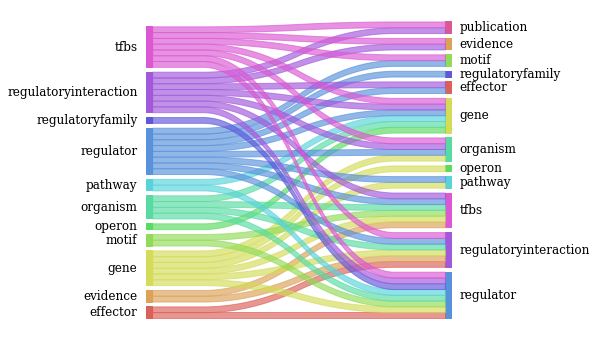

In [11]:
sankey(df["source"], df["target"], fontsize=12)

In [15]:
nodes = [{'name': node.node_name()} for node in entities.values()]
edges = [{'source': rel[0], 'target': rel[1], 'value': 1} for rel in relationships]
net = {'nodes': nodes, 'links': edges}
net

{'nodes': [{'name': 'effector'},
  {'name': 'evidence'},
  {'name': 'gene'},
  {'name': 'motif'},
  {'name': 'operon'},
  {'name': 'organism'},
  {'name': 'pathway'},
  {'name': 'regulator'},
  {'name': 'regulatoryfamily'},
  {'name': 'regulatoryinteraction'},
  {'name': 'source'},
  {'name': 'tfbs'}],
 'links': [{'source': 'effector', 'target': 'regulator', 'value': 1},
  {'source': 'effector', 'target': 'regulatoryinteraction', 'value': 1},
  {'source': 'evidence', 'target': 'tfbs', 'value': 1},
  {'source': 'evidence', 'target': 'regulatoryinteraction', 'value': 1},
  {'source': 'gene', 'target': 'pathway', 'value': 1},
  {'source': 'gene', 'target': 'operon', 'value': 1},
  {'source': 'gene', 'target': 'organism', 'value': 1},
  {'source': 'gene', 'target': 'regulator', 'value': 1},
  {'source': 'gene', 'target': 'tfbs', 'value': 1},
  {'source': 'gene', 'target': 'regulatoryinteraction', 'value': 1},
  {'source': 'motif', 'target': 'tfbs', 'value': 1},
  {'source': 'motif', 'targe

In [16]:
import json
with open('data.json', 'w') as fp:
    json.dump(net, fp)
